# Libreta obsoleta, actualizar los datos en una nueva libreta

In [2]:
# Comparación de los ligandos activos de DUDE frente a los ligandos obtenidos de las estructuras cristalográficas

In [3]:
import rdkit as rd
import pandas as pd
import numpy as np

RDKit WARNING: [17:48:57] Enabling RDKit 2019.09.1 jupyter extensions


In [17]:
# Archivo mol2 con la bivleoteca de ligandos activos dude 2012
dude_dir = '../ARCHIVOS/CRISTALES/LIGS_CDK2/DUDE_DECOYS/DUDE_2012/cdk2'

In [51]:
%%bash -s "$dude_dir"
# convertir la celda aq code para ejecutar
cd $1
obabel -imol2 actives_final.mol2 -opdb -O active_.pdb -m
mkdir actives_splited_pdb
mv active_*pdb actives_splited_pdb

In [57]:
# Cargamos los archivos mol2 de DUDE
from rdkit import Chem
import glob

dude_files = glob.glob('../ARCHIVOS/CRISTALES/LIGS_CDK2/DUDE_DECOYS/DUDE_2012/cdk2/actives_splited_pdb/*')
# Los ordenamos de manera natural
dude_files.sort(key = lambda x : int( x.split('_')[-1][:-4] ))
# para cada elemento se hace el split del path, nos quedamos con el ultimo elemento,
# de éste eleminamos los últimos 5 caracteres para conservar sólo el número, 
# y éste lo usamos como key de ordenamiento

In [59]:
# Cargamos uno a uno los archivos y generamos un diccionario de moléculas dude
dude_ligs_dic = {file.split("/")[-1].split(".")[0]: Chem.MolFromPDBFile(file) for file in dude_files}
len(dude_ligs_dic)

798

In [291]:
cocristal_files = glob.glob('../ARCHIVOS/CRISTALES/LIGS_CDK2/LIGS_PREP_IN_POCKET//*')
cocristal_files = sorted(cocristal_files)
cocristal_ligs = {file.split("/")[-1].split("_")[0]: Chem.MolFromMol2File(file) for file in cocristal_files}
len(cocristal_ligs)

RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 3 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:41] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [13:02:41] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 23 24 25 26
RDKit ERROR: 
RDKit ERROR: [13:02:41] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [13:02:41] 

RDKit ERROR: [13:02:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:42] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 30
RDKit ERROR: 
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [13:02:42] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [13:02:42] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 0 2 18 19 26
RDKit ERROR: 
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 23 24 25 26
RDKit ERROR: 
RDKit ERROR: [13:02:42] Can't kekulize mol.  Unkeku

365

In [62]:
# Fingerprints

In [289]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [290]:
mols_crys = cocristal_ligs.values()
fps_crys = [FingerprintMols.FingerprintMol(x) for x in mols_crys]

In [69]:
mols_dude = dude_ligs_dic.values()
fps_dude = [FingerprintMols.FingerprintMol(x) for x  in  mols_dude]

In [83]:
# Cálculo de la matrix de tanimoto
n_fps_crys = len(fps_crys)
tan_mtx_crys = np.zeros((n_fps_crys, n_fps_crys))

for i in range(1, n_fps_crys):
    sim = DataStructs.BulkTanimotoSimilarity(fps_crys[i] , fps_crys[:])
    tan_mtx_crys[i] = sim

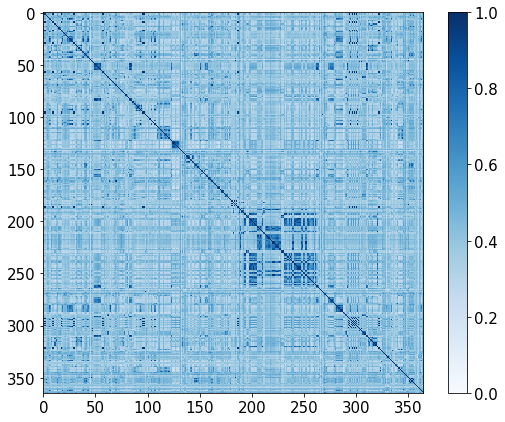

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualizamos la matriz D
fig = plt.figure(figsize=(9, 7))
plt.rcParams.update({'font.size': 15})
plt.imshow(tan_mtx_crys, cmap='Blues')
plt.colorbar();

In [85]:
# Matriz de tanimoto comparando dude entre sí
n_fps_dude = len(fps_dude)
tan_mtx_dude = np.zeros((n_fps_dude, n_fps_dude))

for i in range(1, n_fps_dude):
    sim = DataStructs.BulkTanimotoSimilarity(fps_dude[i], fps_dude[:])
    tan_mtx_dude[i] = sim

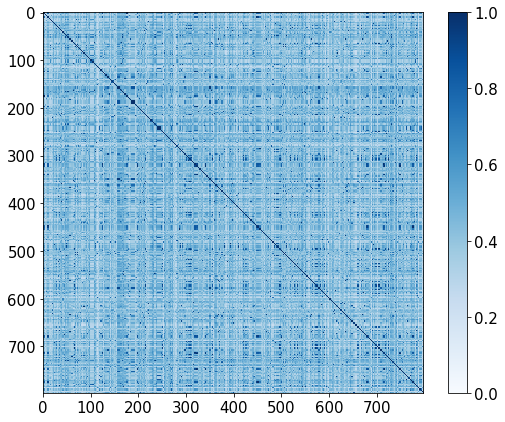

In [101]:
fig = plt.figure(figsize=(9, 7))
plt.rcParams.update({'font.size': 15})
plt.imshow(tan_mtx_dude, cmap='Blues')
plt.colorbar();

In [87]:
# Comparación DUDE vs cristales

In [88]:
tan_mtx_dude_crys = np.zeros((n_fps_crys, n_fps_dude))

for i in range(1, n_fps_crys):
    sim = DataStructs.BulkTanimotoSimilarity(fps_crys[i], fps_dude)
    tan_mtx_dude_crys[i] = sim

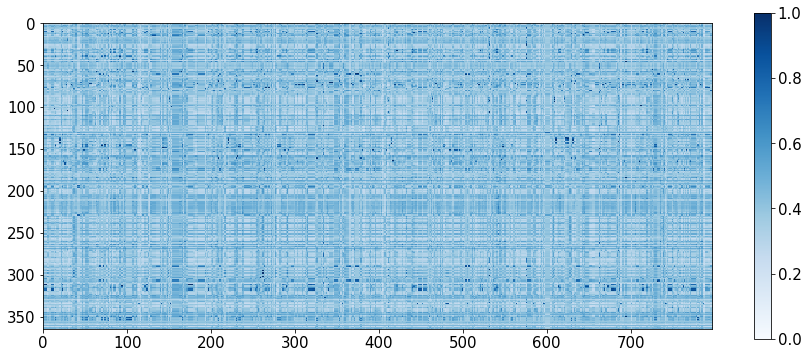

In [100]:
fig = plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 15})
plt.imshow(tan_mtx_dude_crys, cmap='Blues')
plt.colorbar();

In [164]:
contador = 0
for i in fps_crys:
    for j in fps_dude:
        sim = DataStructs.TanimotoSimilarity(i, j)
        if sim >= 0.8:
            contador = contador + 1
            #print(contador)
            break

In [117]:
# ¡Cuántos son realmente el mismo ligando?
# Esa pregunta se responde encontrando todas las filas que tienen al menos un uno

(tan_mtx_dude_crys > 0.8).all()

False

In [128]:
%%bash -s "$dude_dir"
# convertir la celda aq code para ejecutar
cd ../ARCHIVOS/CRISTALES/LIGS_CDK2/DUDE_DECOYS/DUD_2006/dud_ligands2006
obabel -imol2 cdk2_ligands.mol2 -opdb -O active_.pdb -m
mkdir actives_splited_pdb
mv active_*pdb actives_splited_pdb

72 molecules converted
72 files output. The first is active_1.pdb


In [130]:
# Carga los mol2 de DUD 2006
DUD_files = glob.glob('../ARCHIVOS/CRISTALES/LIGS_CDK2/DUDE_DECOYS/DUD_2006/dud_ligands2006/actives_splited_pdb/*')
DUD_files.sort(key = lambda x : int( x.split('_')[-1][:-4] ))

DUD_ligs_dic = {file.split("/")[-1].split(".")[0]: Chem.MolFromPDBFile(file) for file in DUD_files}
len(DUD_ligs_dic)

72

In [131]:
# Calculo de los fingerpirnts
mols_DUD = DUD_ligs_dic.values()
fps_DUD = [FingerprintMols.FingerprintMol(x) for x  in  mols_DUD]

In [132]:
# Ahora calculamos la similitud entre éstos ligandos y los correspondientes a los cocristalizados
n_fps_DUD = len(fps_DUD)
tan_mtx_DUD_crys = np.zeros((n_fps_crys, n_fps_DUD))

for i in range(1, n_fps_crys):
    sim = DataStructs.BulkTanimotoSimilarity(fps_crys[i], fps_DUD)
    tan_mtx_DUD_crys[i] = sim

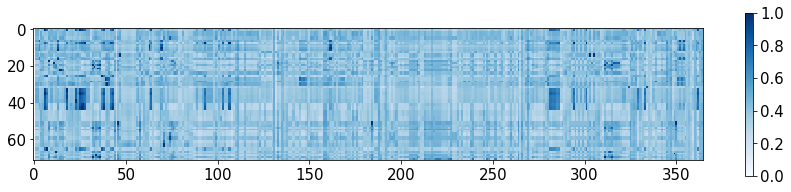

In [136]:
fig = plt.figure(figsize=(15, 3))
plt.rcParams.update({'font.size': 15})
plt.imshow(tan_mtx_DUD_crys.T, cmap='Blues')
plt.colorbar();

In [152]:
# Comprobar si los DUD están en los cristales
contador = 0
for i in fps_DUD:
    for j in fps_crys:
        sim = DataStructs.TanimotoSimilarity(i, j)
        if sim >= 0.5:
            contador = contador + 1
            #print(contador)
            break

In [153]:
# DUD frente a DUDE
tan_mtx_DUD_DUDE = np.zeros((n_fps_DUD, n_fps_dude))

for i in range(1, n_fps_DUD):
    sim = DataStructs.BulkTanimotoSimilarity(fps_DUD[i], fps_dude)
    tan_mtx_DUD_DUDE[i] = sim

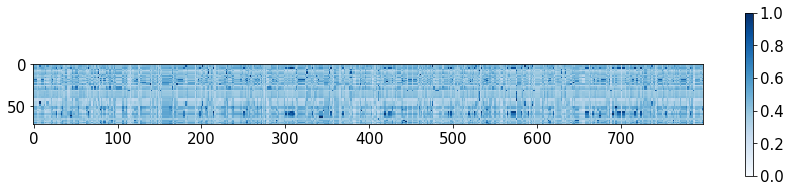

In [155]:
fig = plt.figure(figsize=(15, 3))
plt.rcParams.update({'font.size': 15})
plt.imshow(tan_mtx_DUD_DUDE, cmap='Blues')
plt.colorbar();

In [158]:
# Comprobar si los DUD están en los DUDE
contador = 0
for i in fps_DUD:
    for j in fps_dude:
        sim = DataStructs.TanimotoSimilarity(i, j)
        if sim == 1:
            contador = contador + 1
            #print(contador)
            break

In [ ]:
# En este punto no ha resultado bien la comparación entre moléculas, 
# sin tener un resultado confiable de si las estructuras 

In [182]:
# Puedo hacer web scrapping del ligando en el pdb?

# Cargamos la tabla general de datos
df_cdk2_labels = pd.read_json('./B_DATOS/TABLA_MTDATA_CDK2_402_crys_LIGS_INFO_LABELS_AUC_docking.json')
# Me interesa el código de inhibidores así que lo extremos, no concideramos las celdas vacias
filtro = df_cdk2_labels.Inhib != ''
ligandos_cdk2 = df_cdk2_labels.Inhib[filtro].to_numpy()
print(F'Total de ligandos: {ligandos_cdk2.size}')
# Eliminamos ligandos repetidos
ligandos_cdk2 = np.unique(ligandos_cdk2)
print(F'Total de ligandos ÚNICOS: {ligandos_cdk2.size}')

Total de ligandos: 367
Total de ligandos ÚNICOS: 317


In [187]:
# Intentamos hacer el webscrapping para el primer ligando
ligandos_cdk2[5]

'07Z'

In [274]:
import urllib.request

name_lig = ligandos_cdk2[5]
url_pdb = 'http://www.rcsb.org/ligand'
url_lig = F'{url_pdb}/{name_lig}'
print(url_lig)
# Se extrae el html en bruto del ligando
datos = urllib.request.urlopen( url_lig ).read().decode()

http://www.rcsb.org/ligand/07Z


In [275]:
from bs4 import BeautifulSoup
# Primero nos vamos a enfocar en extrer el smiles
soup = BeautifulSoup(datos)
a = soup.find("tr", {"id": "chemicalIsomeric"})
print(a)
smiles_07z_web = a.find('td').text
smiles_07z_web

<tr id="chemicalIsomeric"><th>Isomeric SMILES</th><td style="word-wrap: break-word">Nc1nc(Nc2ccc(cc2)C(O)=O)sc1C(=O)c1cccnc1</td></tr>


'Nc1nc(Nc2ccc(cc2)C(O)=O)sc1C(=O)c1cccnc1'

In [276]:
# La siguiente pregunta es, son los smiles similares, o al menos rdkit nos puede decir si son
# son las mismas moléculas mediante fingerprints y tanimoto?
# Recordar que vamos a comparar directamente un smiles extraido del pdb, con un pdb extraido de
# la estructura cristalográfica

# el pdbid de la molécula 07Z es 3RK5

# ya teniamos cargado el ligando, sólo lo extraemos del diccionario
mol_07z = cocristal_ligs["3rk5"]
# Convertimos a smiles
smiles_07z_crys = Chem.MolToSmiles(mol_07z)
smiles_07z_crys

'NC1NC(NC2CCC(C(O)O)CC2)SC1C(O)C1CCCNC1'

In [277]:
# Ahora comparamos los fingerprints de ambos smiles
mol_web = Chem.MolFromSmiles(smiles_07z_web)
mol_crys = Chem.MolFromSmiles(smiles_07z_crys)

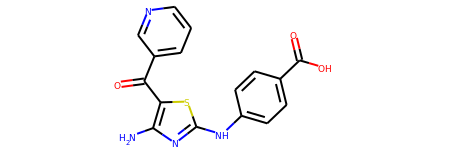

In [278]:
mol_web

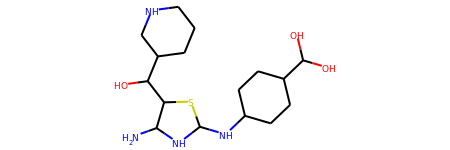

In [271]:
mol_crys

In [265]:
# Calculamos los fingerpirnts
fp_m_web = FingerprintMols.FingerprintMol(mol_web)
fp_m_crys = FingerprintMols.FingerprintMol(mol_crys)

# Comparamos con tanimoto la similitud
DataStructs.TanimotoSimilarity(fp_m_web, fp_m_crys)

0.43672939649578196

In [257]:
# Ahora comparamos ambas moléculas con la cristal cargada desde el pdb
fp_m_crys_pdb = FingerprintMols.FingerprintMol(mol_07z)
DataStructs.TanimotoSimilarity(fp_m_web, fp_m_crys_pdb)

0.24365079365079365

In [258]:
DataStructs.TanimotoSimilarity(fp_m_crys, fp_m_crys_pdb)

1.0

In [ ]:
# PRegunta:
# ¿Si calculo el smiles con rdkit, es igual al smiles que puedo obtener del PDB dle ligando?